In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\vinay\Downloads\archive (16)\IMDB-Movie-Data.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [7]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].median(), inplace=True)
df['Metascore'].fillna(df['Metascore'].median(), inplace=True)

In [9]:
df['Blockbuster'] = df['Revenue (Millions)'].apply(lambda x: 1 if x > 100 else 0)

In [10]:
df['Main Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])

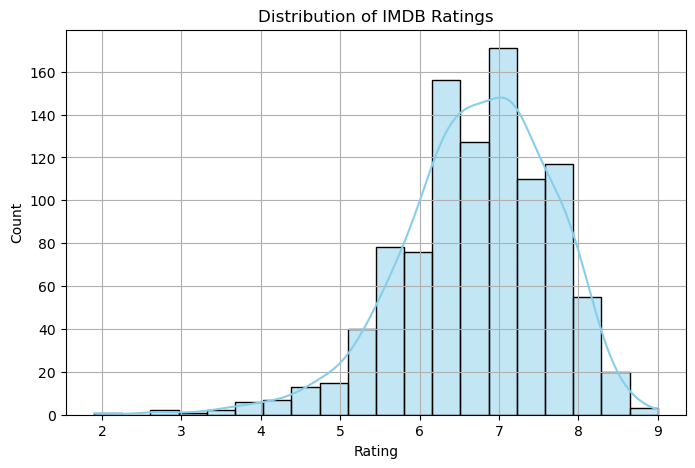

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

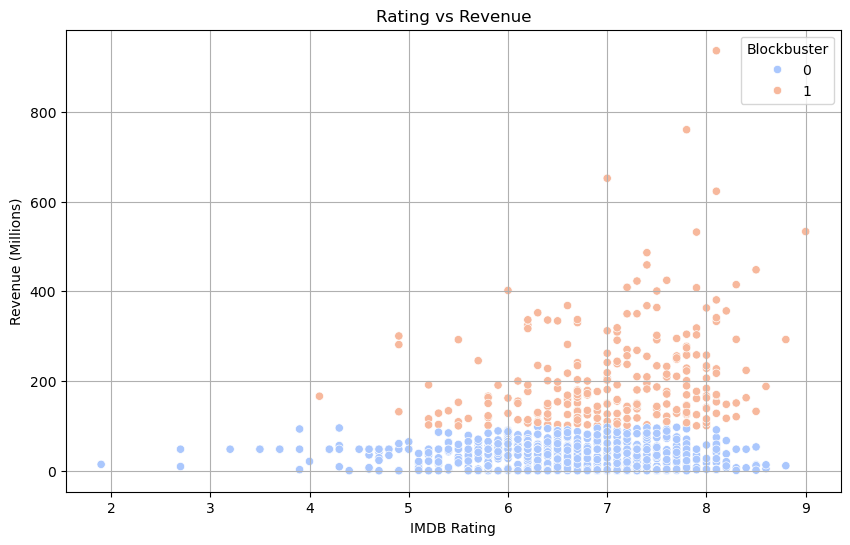

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Rating', y='Revenue (Millions)', hue='Blockbuster', palette='coolwarm')
plt.title('Rating vs Revenue')
plt.xlabel('IMDB Rating')
plt.ylabel('Revenue (Millions)')
plt.grid(True)
plt.show()

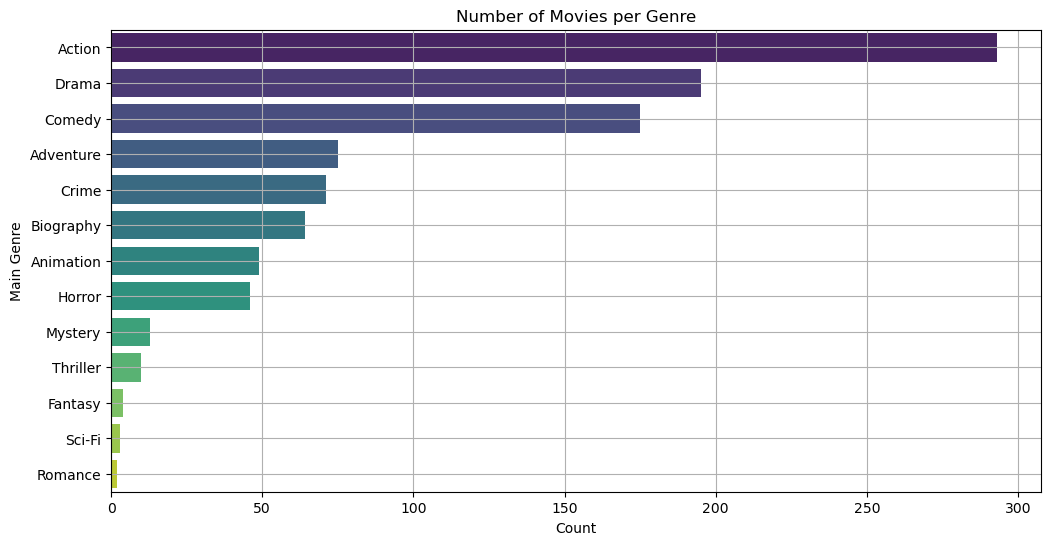

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(y='Main Genre', data=df, order=df['Main Genre'].value_counts().index, palette='viridis')
plt.title('Number of Movies per Genre')
plt.xlabel('Count')
plt.ylabel('Main Genre')
plt.grid(True)
plt.show()

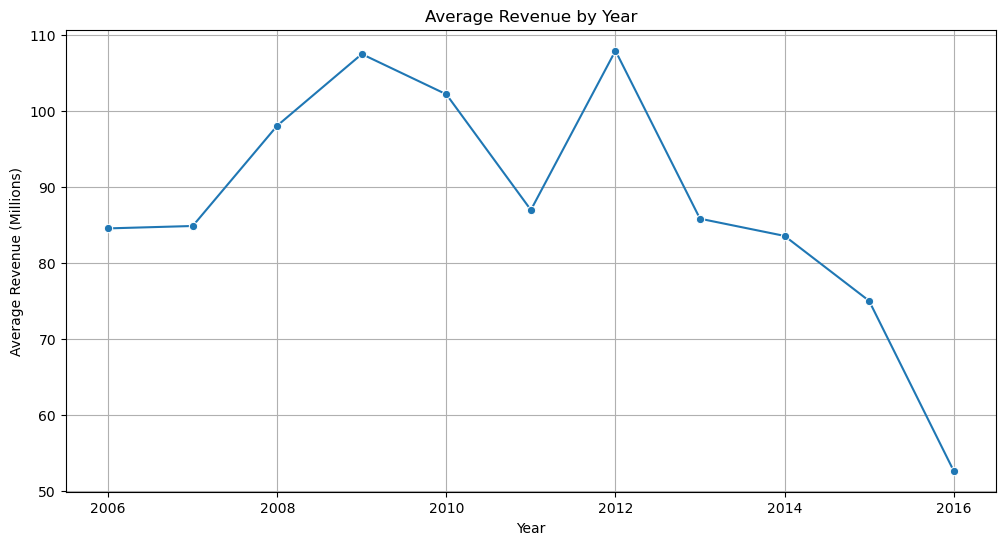

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Revenue (Millions)', data=df, estimator='mean', ci=None, marker='o')
plt.title('Average Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue (Millions)')
plt.grid(True)
plt.show()

In [17]:
le = LabelEncoder()
df['Main Genre Encoded'] = le.fit_transform(df['Main Genre'])

features = ['Runtime (Minutes)', 'Revenue (Millions)', 'Metascore', 'Votes', 'Main Genre Encoded']
target = 'Rating'

X = df[features]
y = df[target]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

In [22]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = reg.score(X_test, y_test)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 0.67
R² Score: 0.53


In [23]:
# Features and new target
features = ['Runtime (Minutes)', 'Revenue (Millions)', 'Metascore', 'Votes', 'Main Genre Encoded']
target = 'Blockbuster'

X = df[features]
y = df[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

In [25]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       152
           1       0.89      0.98      0.93        48

    accuracy                           0.96       200
   macro avg       0.94      0.97      0.95       200
weighted avg       0.97      0.96      0.97       200



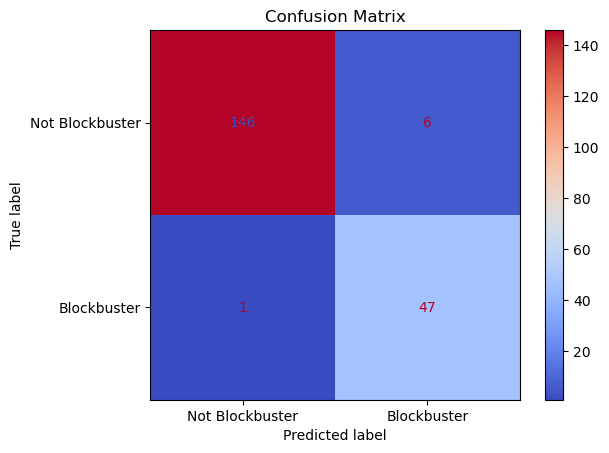

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Blockbuster", "Blockbuster"])
disp.plot(cmap='coolwarm')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()